In [1]:
from openai import OpenAI
from IPython.display import display
from IPython.display import Image as ip_image
import base64
import re
import os
from PIL import Image
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

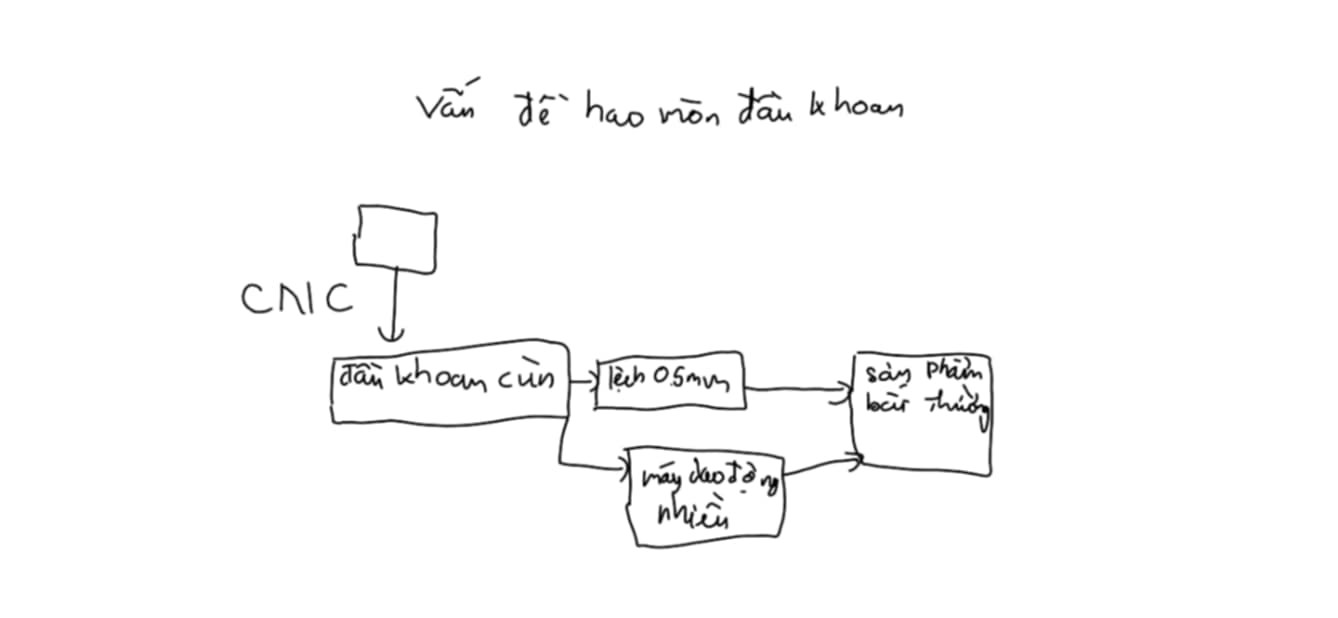

In [3]:
Imagefile = r"D:\Data Science stuffs\DENSO OCR\img2diag\4feda86f-bbdc-49f5-a9f9-547d62f2e439.jpg"
image = Image.open(Imagefile)
display(image)



In [22]:
client = OpenAI()

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
Imagefile = r"D:\Data Science stuffs\DENSO OCR\Ảnh chụp màn hình 2024-11-27 213311.png"

# Getting the base64 string
base64_image = encode_image(Imagefile)

response = client.chat.completions.create(
model="gpt-4o",
messages=[
    {
    "role": "user",
    "content": [
        {
        "type": "text",
        "text": "Define elements and connections based on this Vietnamese user's diagram, take into consideration that this diagram is made in a Vietnamese factory setting to correct any context mistake. Transcribe to jsonl format:\n{\"type\": \"node\", \"data\": {\"id\": str, \"label\": str, \"x\": int, \"y\": int}}\n{\"type\": \"node\", \"data\": {\"id\": str, \"label\": str, \"x\": int, \"y\": int}}\n{\"type\": \"arrow\", \"data\": {\"source\": str, \"target\": str,\"label\": str}}",
        },
        {
        "type": "image_url",
        "image_url": {
            "url":  f"data:image/jpeg;base64,{base64_image}"
        },
        },
    ],
    }
],
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```jsonl\n{"type": "node", "data": {"id": "n1", "label": "Máy A", "x": 100, "y": 100}}\n{"type": "node", "data": {"id": "n2", "label": "Nóng thiết bị AB", "x": 250, "y": 150}}\n{"type": "node", "data": {"id": "n3", "label": "Sản phẩm bất thường nữa ABC", "x": 400, "y": 150}}\n{"type": "arrow", "data": {"source": "n1", "target": "n2", "label": "Vấn đề: bị chao dây"}}\n{"type": "arrow", "data": {"source": "n2", "target": "n3", "label": "Biên độ nhiệt 5°C"}}\n{"type": "arrow", "data": {"source": "n3", "target": "n2", "label": "Tốc độ máy dao động 0.9"}}\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


In [23]:
response1 = repr(response.choices[0].message.content)
print(response1)

'```jsonl\n{"type": "node", "data": {"id": "n1", "label": "Máy A", "x": 100, "y": 100}}\n{"type": "node", "data": {"id": "n2", "label": "Nóng thiết bị AB", "x": 250, "y": 150}}\n{"type": "node", "data": {"id": "n3", "label": "Sản phẩm bất thường nữa ABC", "x": 400, "y": 150}}\n{"type": "arrow", "data": {"source": "n1", "target": "n2", "label": "Vấn đề: bị chao dây"}}\n{"type": "arrow", "data": {"source": "n2", "target": "n3", "label": "Biên độ nhiệt 5°C"}}\n{"type": "arrow", "data": {"source": "n3", "target": "n2", "label": "Tốc độ máy dao động 0.9"}}\n```'


In [24]:
response = client.chat.completions.create(
model="gpt-4o",
messages=[
    {
    "role": "user",
    "content": [
        {
        "type": "text",
        "text": "Define elements and connections based on this Vietnamese user's diagram, take into consideration that this diagram is made in a Vietnamese factory setting to correct any context mistake. Transcribe to jsonl format:\n{\"type\": \"node\", \"data\": {\"id\": str, \"label\": str}}\n{\"type\": \"node\", \"data\": {\"id\": str, \"label\": str}}\n{\"type\": \"arrow\", \"data\": {\"id\": str, \"id_source\": str, \"id_target\": str,\"label\": str}}",
        },
        {
        "type": "image_url",
        "image_url": {
            "url":  f"data:image/jpeg;base64,{base64_image}"
        },
        },
    ],
    },
    {
    "role": "assistant",
    "content": [{ "type": "text", "text": response1 }]
    },
    {
    "role": "user",
    "content": [
        {
        "type": "text",
        "text": "From this jsonl file reorganize the diagram structuredly centered at (0,0) to return new json that contains (x1,y1),(x2,y2) rectangle cordinate for each node and corresponding (x1,y1), (x2,y2), (optional (x3,y3) for 2-line arrow) arrow cordinate for each arrow base on \"id_source\" and \"id_target\". Example format below:\n{\"type\": \"node\", \"data\": {\"id\": \"str\", \"label\": \"str\", \"x1\": \"int\", \"y1\": \"int\", \"x2\": \"int\", \"y2\": \"int\"}}\n{\"type\": \"node\", \"data\": {\"id\": \"str\", \"label\": \"str\", \"x1\": \"int\", \"y1\": \"int\", \"x2\": \"int\", \"y2\": \"int\"}}\n{\"type\": \"arrow\", \"data\": {\"id\": \"str\", \"label\": \"str\", \"x1\": \"int\", \"y1\": \"int\", \"x2\": \"int\", \"y2\": \"int\", \"x3\": \"Optional[int]\", \"y3\": \"Optional[int]\"}}"
        },   
    ],
    },
],
)


In [40]:
response2 = response.choices[0].message.content
print(response2)

```json
{"type": "node", "data": {"id": "n1", "label": "Máy A", "x1": -200, "y1": -50, "x2": -100, "y2": 50}}
{"type": "node", "data": {"id": "n2", "label": "Nóng thiết bị AB", "x1": -75, "y1": 0, "x2": 75, "y2": 100}}
{"type": "node", "data": {"id": "n3", "label": "Sản phẩm bất thường nữa ABC", "x1": 225, "y1": 0, "x2": 375, "y2": 100}}
{"type": "arrow", "data": {"id": "a1", "label": "Vấn đề: bị chao dây", "x1": -100, "y1": 0, "x2": -75, "y2": 50}}
{"type": "arrow", "data": {"id": "a2", "label": "Biên độ nhiệt 5°C", "x1": 75, "y1": 50, "x2": 225, "y2": 50}}
{"type": "arrow", "data": {"id": "a3", "label": "Tốc độ máy dao động 0.9", "x1": 375, "y1": 50, "x2": 75, "y2": 75, "x3": -75, "y3": 50}}
```


In [ ]:
jsonl_content = response2.split("```")[1]
if repr(jsonl_content.startswith(r"json\n")):
    jsonl_content = jsonl_content[4:]
elif repr(jsonl_content.startswith(r"jsonl\n")):
    jsonl_content = jsonl_content[5:]

print(f"{jsonl_content}\n")


{"type": "node", "data": {"id": "n1", "label": "Máy A", "x1": -200, "y1": -50, "x2": -100, "y2": 50}}
{"type": "node", "data": {"id": "n2", "label": "Nóng thiết bị AB", "x1": -75, "y1": 0, "x2": 75, "y2": 100}}
{"type": "node", "data": {"id": "n3", "label": "Sản phẩm bất thường nữa ABC", "x1": 225, "y1": 0, "x2": 375, "y2": 100}}
{"type": "arrow", "data": {"id": "a1", "label": "Vấn đề: bị chao dây", "x1": -100, "y1": 0, "x2": -75, "y2": 50}}
{"type": "arrow", "data": {"id": "a2", "label": "Biên độ nhiệt 5°C", "x1": 75, "y1": 50, "x2": 225, "y2": 50}}
{"type": "arrow", "data": {"id": "a3", "label": "Tốc độ máy dao động 0.9", "x1": 375, "y1": 50, "x2": 75, "y2": 75, "x3": -75, "y3": 50}}


